In [1]:
import open3d as o3d
print(o3d.__version__)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
0.18.0


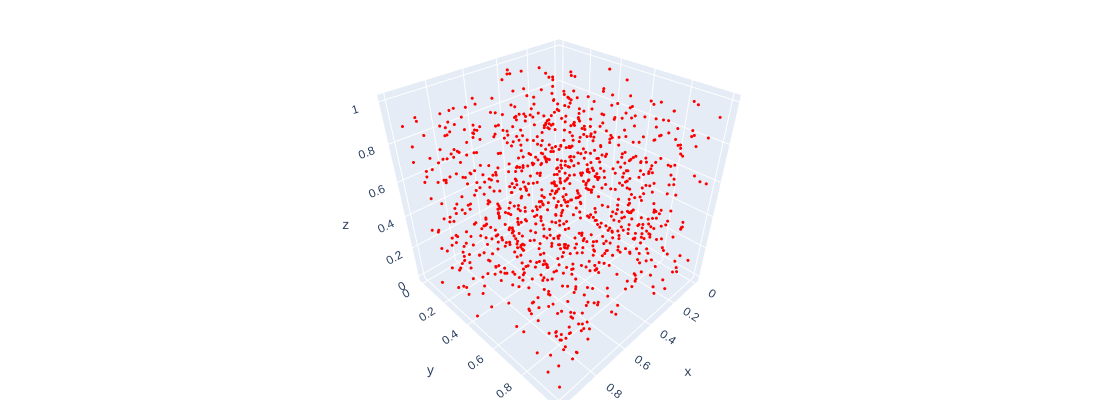

In [6]:
import open3d as o3d
import numpy as np
import plotly.graph_objects as go

pcd = o3d.geometry.PointCloud()
points = np.random.rand(1000,3)
pcd.points = o3d.utility.Vector3dVector(points)

o3d.visualization.draw_plotly([pcd])

In [7]:
o3d.visualization.draw_geometries([pcd])

libGL: Can't open configuration file /etc/drirc: No such file or directory.
libGL: Can't open configuration file /home/daniel-choate/.drirc: No such file or directory.
using driver i915 for 77
libGL: Can't open configuration file /etc/drirc: No such file or directory.
libGL: Can't open configuration file /home/daniel-choate/.drirc: No such file or directory.
using driver i915 for 77
pci id for fd 77: 8086:a7a0, driver iris
MESA-LOADER: dlopen(/usr/lib/x86_64-linux-gnu/dri/iris_dri.so)
libGL: Can't open configuration file /etc/drirc: No such file or directory.
libGL: Can't open configuration file /home/daniel-choate/.drirc: No such file or directory.
libGL: Can't open configuration file /etc/drirc: No such file or directory.
libGL: Can't open configuration file /home/daniel-choate/.drirc: No such file or directory.
libGL: Can't open configuration file /etc/drirc: No such file or directory.
libGL: Can't open configuration file /home/daniel-choate/.drirc: No such file or directory.
Using 

In [ ]:
# Plotting with a background color 

vis = o3d.visualization.Visualizer()
vis.create_window()
vis.add_geometry(pcd)

render_option = vis.get_render_option()

# LIGHT BLUE
render_option.background_color = [0.678, 0.847, 0.902]

vis.run()

vis.destroy_window()

In [ ]:
# # Convert .txt files to .xyz files to be match open3d format

# # Replace with your input and output file paths
# input_file = ptCloud1_fn
# output_file1 = "/home/daniel-choate/ASAR/s1/ErrorVectorFields/Cloud1_ExpD.xyz"

# # Read data from .txt file
# with open(input_file, 'r') as f:
#     lines = f.readlines()

# # Extract XYZ coordinates and write to .xyz file
# with open(output_file1, 'w') as f:
#     for line in lines:
#         if line.strip():  # Check if line is not empty
#             # Assuming each line contains XYZ coordinates separated by spaces or commas
#             parts = line.strip().split()
#             if len(parts) >= 3:
#                 x, y, z = parts[:3]  # Extract XYZ coordinates
#                 f.write(f"{x} {y} {z}\n")  # Write XYZ coordinates in .xyz format

# # Replace with your input and output file paths
# input_file = ptCloud10_fn
# output_file10 = "/home/daniel-choate/ASAR/s1/ErrorVectorFields/Cloud10_ExpD.xyz"

# # Read data from .txt file
# with open(input_file, 'r') as f:
#     lines = f.readlines()

# # Extract XYZ coordinates and write to .xyz file
# with open(output_file10, 'w') as f:
#     for line in lines:
#         if line.strip():  # Check if line is not empty
#             # Assuming each line contains XYZ coordinates separated by spaces or commas
#             parts = line.strip().split()
#             if len(parts) >= 3:
#                 x, y, z = parts[:3]  # Extract XYZ coordinates
#                 f.write(f"{x} {y} {z}\n")  # Write XYZ coordinates in .xyz format